# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dewi Kunthi Siswati Suryo
- **Email:** dewikunthi6@gmail.com
- **ID Dicoding:** dewikunthisiswati

## Menentukan Pertanyaan Bisnis

- Pada musim apakah rata-rata penyewaan sepeda tertinggi?
- Bagaimana rata-rata pola penyewaan sepeda perbulannya?
- Bagaimana rata-rata jumlah sewa sepeda perhari?

## Import Semua Packages/Library yang Digunakan

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn 
import plotly.express as px
from datetime import datetime

## Data Wrangling

### Gathering Data

In [140]:
hour = pd.read_csv('D:/LaskarAI/laskarai/data/hour.csv', delimiter = ';')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01/01/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01/01/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01/01/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01/01/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [141]:
# Menghitung jumlah baris dan kolom pada data
print('Jumlah baris :', hour.shape[0])
print('Jumlah kolom :', hour.shape[1])

Jumlah baris : 17379
Jumlah kolom : 17


**Insight:** Terdapat 17379 baris dan 17 kolom pada data.

### Assessing Data

**Keterangan Data**
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month 
- hr : hour
- holiday : weather day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0
- weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [142]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:** Terdapat kesalahan tipe data pada kolom dteday yang seharusnya lebih tepat direpresentasikan sebagai tipe data datetime. Selain itu, kolom season, yr, mnth, holiday, weekday, workingday, dan weathersit juga termasuk ke dalam data kategori.

In [143]:
# Pengecekan missing value
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:** Tidak terdapat missing value pada data.

In [144]:
# Pengecekan duplikat data
hour.duplicated().sum()

np.int64(0)

**Insight:** Tidak terdapat duplikasi pada data.

In [145]:
# Memeriksa parameter statistik dari setiap kolom numerik
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [146]:
# Mengubah tipe data yang tidak sesuai
hour['dteday']=pd.to_datetime(hour['dteday'], dayfirst=True)
hour['season']=hour.season.astype('category')
hour['yr']=hour.yr.astype('category')
hour['mnth']=hour.mnth.astype('category')
hour['hr']=hour.hr.astype('category')
hour['holiday']=hour.holiday.astype('category')
hour['weekday']=hour.weekday.astype('category')
hour['workingday']=hour.workingday.astype('category')
hour['weathersit']=hour.weathersit.astype('category')

In [147]:
# Memeriksa kembali tipe data
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:** Kesalahan tipe data sudah ditangani. Kolom dteday telah direpresentasikan sebagai tipe data datetime serta kolom season, yr, mnth, holiday, weekday, workingday, dan weathersit sudah termasuk ke dalam data kategori.

## Exploratory Data Analysis (EDA)

### Explore Data Hour

In [148]:
hour.describe(include = 'all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4.0,2.0,12.0,24.0,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,7.0,16.0,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496.0,8734.0,1488.0,730.0,16879.0,2512.0,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [149]:
# Jumlah total sepeda yang disewa
def total_count(hour, column) :
    return hour[column].sum()

print("Total Sepeda yang Disewa =", total_count(hour, 'cnt'))
print("Total Pengguna Terdaftar =", total_count(hour, 'registered'))
print("Total Pengguna Biasa =", total_count(hour, 'casual'))

Total Sepeda yang Disewa = 3292679
Total Pengguna Terdaftar = 2672662
Total Pengguna Biasa = 620017


**Insight:** Dapat dilihat bahwa total sepeda yang disewa sebanyak 3.292.679 dengan total pengguna terdaftar sebanyak 2.672.662 dan total pengguna biasa sebanyak 620.017.

In [150]:
# Persebaran rata-rata jumlah sewa sepeda perjam
hour.groupby('hr', observed=False)['cnt'].mean().reset_index().sort_values('cnt', ascending=False)

,hr,cnt
17,17,461.452055
18,18,425.510989
8,8,359.011004
16,16,311.983562
19,19,311.523352
13,13,253.661180
12,12,253.315934
15,15,251.233196
14,14,240.949246
20,20,226.030220


**Insight:** Dapat dilihat bahwa rata-rata jam penyewaan seoeda tertinggi pada pukul 17.00  dan terendah pada pukul 4.00.

In [151]:
# Rata-rata jumlah sewa berdasarkan workingday
hour.groupby('workingday', observed=False)['cnt'].mean().reset_index().sort_values('cnt', ascending=False)

,workingday,cnt
1,1,193.207754
0,0,181.405332


**Insight:** Dapat dilihat bahwa rata-rata jumlah sewa sepeda pada hari kerja(1) lebih tinggi dibandingkan pada weekend/holiday(0).

In [152]:
# Pengelompokkan penyewa sepeda berdasarkan cuaca
hour.groupby('weathersit', observed=False).agg({
    'cnt': ['mean', 'max', 'min']
}).reset_index()

weathersit         cnt         
                    mean  max min
0          1  204.869272  977   1
1          2  175.165493  957   1
2          3  111.579281  891   1
3          4   74.333333  164  23

**Insight:** Dapat dilihat bahwa saat cuaca Clear(1), rata-rata penyewaan sepeda lebih tinggi. Dan saat heavy rain(4), rata-rata penyewaan sepeda jauh lebih sedikit.

In [153]:
# Pengelompokkan penyewa sepeda berdasarkan musim
hour.groupby('season', observed=False).agg({
    'cnt': ['mean', 'max', 'min'],
    'casual': ['mean', 'max', 'min'],
    'registered': ['mean', 'max', 'min']
}).reset_index()

season         cnt              casual           registered         
                mean  max min       mean  max min        mean  max min
0      1  111.114569  801   1  14.290901  367   0   96.823668  681   0
1      2  208.344069  957   1  46.160581  361   0  162.183488  782   0
2      3  236.016237  977   1  50.287144  350   0  185.729093  886   0
3      4  198.868856  967   1  30.666824  362   0  168.202032  876   0

**Insight:** Dapat dilihat bahwa rata-rata penyewaan sepeda terbanyak terjadi pada musim Fall(3) dan rata-rata penyewaan sepeda paling sedikit terjadi pada musim Springer(1).

In [154]:
# Pola penyewa sepeda berdasarkan bulan
hour.groupby(['yr', 'mnth'], observed=False).agg({
    'cnt': ['mean', 'max', 'min'],
    'casual': ['mean', 'max', 'min'],
    'registered': ['mean', 'max', 'min']
}).reset_index()

yr mnth         cnt              casual           registered         
                  mean  max min       mean  max min        mean  max min
0   0    1   55.507267  249   1   4.466570   47   0   51.040698  247   0
1   0    2   74.291217  327   1   9.617874  108   0   64.673344  275   0
2   0    3   87.732877  336   1  17.569863  175   0   70.163014  312   0
3   0    4  131.947149  530   1  31.079277  240   0  100.867872  486   0
4   0    5  182.555108  611   1  41.733871  237   0  140.821237  540   1
5   0    6  199.322222  638   1  42.516667  210   0  156.805556  555   0
6   0    7  189.974462  596   1  48.994624  248   0  140.979839  517   1
7   0    8  186.991792  651   1  39.455540  196   0  147.536252  549   0
8   0    9  177.709902  628   1  37.022315  245   0  140.687587  567   0
9   0   10  166.232840  625   1  33.946164  272   0  132.286676  553   1
10  0   11  142.095967  553   1  21.688456  191   0  120.407510  523   1
11  0   12  117.844804  477   1  11.400810  115   0  106.443995  462   0
12  1    1  130.558704  559   1  12.103914  156   0  118.454791  518   1
13  1    2  149.041908  610   1  12.602601  229   0  136.439306  567   1
14  1    3  221.904441  957   1  42.554509  367   0  179.349933  693   0
15  1    4  242.651811  822   1  53.559889  355   0  189.091922  697   1
16  1    5  263.259409  873   1  59.455645  361   0  203.803763  770   1
17  1    6  281.708333  900   4  60.130556  297   0  221.577778  796   3
18  1    7  273.665323  913   2  56.055108  269   0  217.610215  790   1
19  1    8  288.310484  941   3  58.060484  289   0  230.250000  811   2
20  1    9  303.573611  977   3  60.802778  350   0  242.770833  886   3
21  1   10  280.848870  963   1  48.782486  362   0  232.066384  876   1
22  1   11  212.623955  729   1  29.260446  304   0  183.363510  709   0
23  1   12  166.729111  759   1  17.850404  167   0  148.878706  737   1

**Insight:** Dapat dilihat bahwa bulan September(9) tahun 2012(1) merupakan bulan penyewaan sepeda tertinggi.

In [155]:
# Pengelompokkan penyewa sepeda berdasarkan hari 
hour.groupby('weekday', observed=False).agg({
    'cnt': ['mean', 'max', 'min'],
    'casual': ['mean', 'max', 'min'],
    'registered': ['mean', 'max', 'min']
}).reset_index()

weekday         cnt              casual           registered         
                 mean  max min       mean  max min        mean  max min
0       0  177.468825  776   1  56.163469  317   0  121.305356  526   0
1       1  183.744655  968   1  28.553449  272   0  155.191206  857   0
2       2  191.238891  970   1  23.580514  178   0  167.658377  871   0
3       3  191.130505  977   1  23.159192  237   0  167.971313  886   0
4       4  196.436665  976   1  24.872521  154   0  171.564144  885   0
5       5  196.135907  957   1  31.458786  264   0  164.677121  757   0
6       6  190.209793  783   1  61.246815  367   0  128.962978  491   0

**Insight:** Dapat dilihat bahwa penyewaan sepeda terbanyak pada hari Kamis(4) dan Jumat(5).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apakah rata-rata penyewaan sepeda tertinggi?

In [156]:
hour.groupby('season', observed=False).agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

,season,cnt,casual,registered
0,1,111.114569,14.290901,96.823668
1,2,208.344069,46.160581,162.183488
2,3,236.016237,50.287144,185.729093
3,4,198.868856,30.666824,168.202032


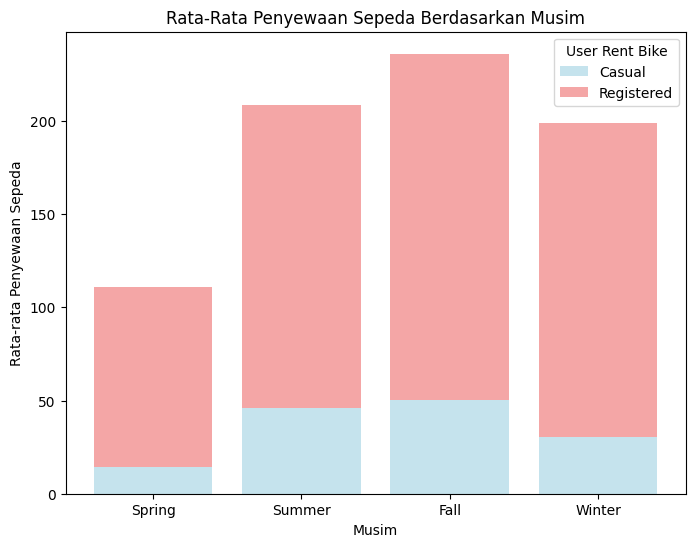

In [157]:
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

season_data = hour.groupby('season', observed=False).agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

season_data['season'] = season_data['season'].map(season_mapping)

order = ['Spring', 'Summer', 'Fall', 'Winter']
season_data = season_data.set_index('season').loc[order].reset_index()

casual_avg_rentals = season_data['casual']
registered_avg_rentals = season_data['registered']

plt.figure(figsize=(8, 6))
plt.bar(season_data['season'], casual_avg_rentals, color='lightblue', label='Casual', alpha=0.7)
plt.bar(season_data['season'], registered_avg_rentals, color='lightcoral', bottom=casual_avg_rentals, label='Registered', alpha=0.7)

plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.title('Rata-Rata Penyewaan Sepeda Berdasarkan Musim')

plt.legend(title='User Rent Bike')

plt.show()

**Insight:** Dapat dilihat pada hasil di atas, data menunjukkan bahwa musim berdampak signifikan terhadap penyewaan sepeda. umlah penyewaan sepeda paling rendah terjadi pada musim semi (Spring), sedangkan puncak penyewaan terjadi pada musim gugur (Fall). Pengguna terdaftar (Registered) selalu mendominasi jumlah penyewaan dibandingkan pengguna kasual (Casual) di semua musim. Namun, pengguna kasual cenderung lebih banyak menyewa sepeda pada musim panas (Summer) dan musim gugur, yang kemungkinan disebabkan oleh cuaca yang lebih mendukung untuk aktivitas luar ruangan. Meskipun ada sedikit penurunan di musim dingin (Winter), penyewaan sepeda tetap cukup tinggi, terutama oleh pengguna terdaftar, yang mengindikasikan bahwa mereka menggunakan sepeda sebagai alat transportasi rutin terlepas dari musim.

### Pertanyaan 2: Bagaimana rata-rata pola penyewaan sepeda perbulannya?

In [158]:
hour.groupby(['yr', 'mnth'], observed=False).agg({ 
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

,yr,mnth,cnt,casual,registered
0,0,1,55.507267,4.466570,51.040698
1,0,2,74.291217,9.617874,64.673344
2,0,3,87.732877,17.569863,70.163014
3,0,4,131.947149,31.079277,100.867872
4,0,5,182.555108,41.733871,140.821237
5,0,6,199.322222,42.516667,156.805556
6,0,7,189.974462,48.994624,140.979839
7,0,8,186.991792,39.455540,147.536252
8,0,9,177.709902,37.022315,140.687587
9,0,10,166.232840,33.946164,132.286676


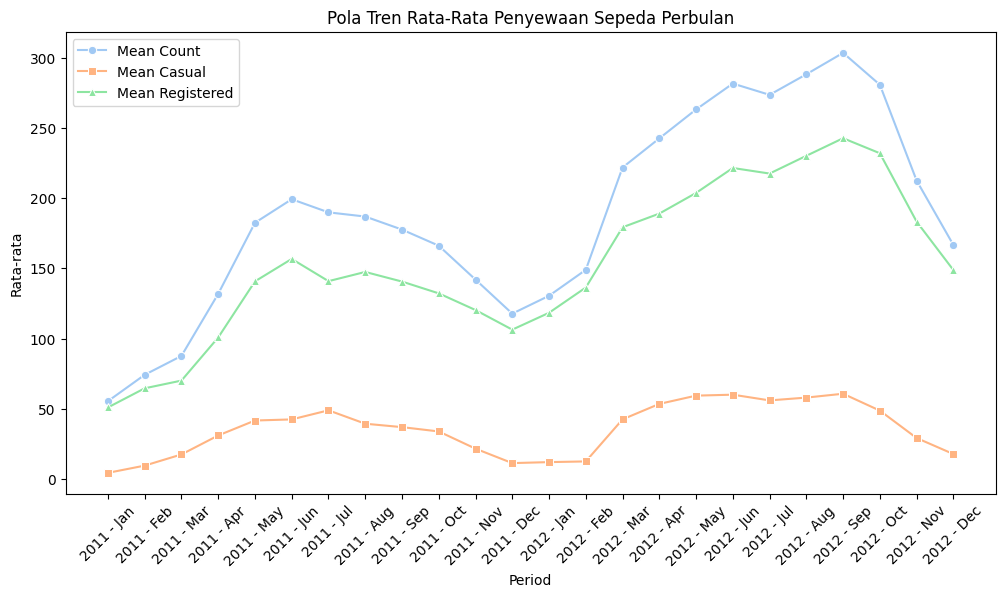

In [159]:
agg_data = hour.groupby(['yr', 'mnth'], observed=False).agg({ 
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

agg_data['yr'] = agg_data['yr'].astype(int)
agg_data['mnth'] = agg_data['mnth'].astype(int)
agg_data['period'] = agg_data['yr'].replace({0: 2011, 1: 2012}).astype(str) + ' - ' + agg_data['mnth'].apply(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(12, 6))
sns.lineplot(x='period', y='cnt', data=agg_data, label='Mean Count', marker='o')
sns.lineplot(x='period', y='casual', data=agg_data, label='Mean Casual', marker='s')
sns.lineplot(x='period', y='registered', data=agg_data, label='Mean Registered', marker='^')

plt.xticks(rotation=45)
plt.xlabel('Period')
plt.ylabel('Rata-rata')
plt.title('Pola Tren Rata-Rata Penyewaan Sepeda Perbulan')
plt.legend()
plt.grid(False)
plt.show()

**Insight:** Dapat dilihat pada hasil di atas, grafik menunjukkan tren rata-rata jumlah penyewaan sepeda berdasarkan bulan dan tahun dengan pola musiman yang jelas. Jumlah penyewaan cenderung rendah di awal tahun, kemudian mengalami peningkatan signifikan di pertengahan tahun, dan mengalami penurunan di akhir tahun. Pengguna terdaftar memiliki tren penyewaan yang lebih stabil dibandingkan pengguna kasual, yang lebih fluktuatif. Tahun 2012 menunjukkan peningkatan jumlah penyewaan dibandingkan 2011.

### Pertanyaan 3: Bagaimana rata-rata jumlah sewa sepeda perhari?

In [160]:
hour.groupby('weekday', observed=False).agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

,weekday,cnt,casual,registered
0,0,177.468825,56.163469,121.305356
1,1,183.744655,28.553449,155.191206
2,2,191.238891,23.580514,167.658377
3,3,191.130505,23.159192,167.971313
4,4,196.436665,24.872521,171.564144
5,5,196.135907,31.458786,164.677121
6,6,190.209793,61.246815,128.962978


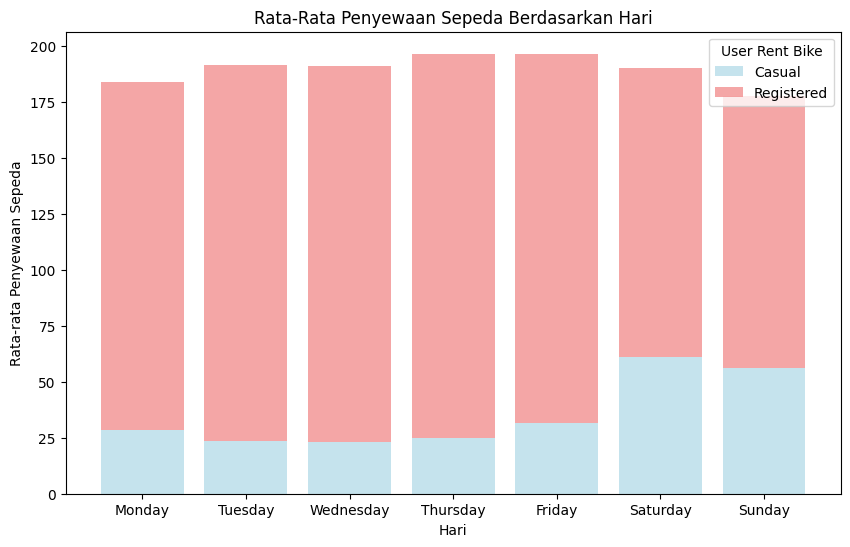

In [161]:
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
                   4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

weekday_data = hour.groupby('weekday', observed=False).agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

weekday_data['weekday'] = weekday_data['weekday'].map(weekday_mapping)

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_data = weekday_data.set_index('weekday').loc[order].reset_index()

casual_avg_rentals = weekday_data['casual']
registered_avg_rentals = weekday_data['registered']

plt.figure(figsize=(10, 6))
plt.bar(weekday_data['weekday'], casual_avg_rentals, color='lightblue', label='Casual', alpha=0.7)
plt.bar(weekday_data['weekday'], registered_avg_rentals, color='lightcoral', bottom=casual_avg_rentals, label='Registered', alpha=0.7)

plt.xlabel('Hari')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.title('Rata-Rata Penyewaan Sepeda Berdasarkan Hari')

plt.legend(title='User Rent Bike')

plt.show()

**Insight:** Grafik menunjukkan rata-rata penyewaan sepeda harian. Secara umum, jumlah penyewaan sepeda oleh pengguna terdaftar jauh lebih tinggi dibandingkan pengguna kasual setiap harinya. Namun, terdapat peningkatan signifikan dalam jumlah penyewaan oleh pengguna kasual pada hari Sabtu dan Minggu, yang menunjukkan tren bahwa pengguna kasual lebih banyak menyewa sepeda saat akhir pekan dibandingkan hari kerja. Sebaliknya, pengguna terdaftar cenderung memiliki pola penyewaan yang konsisten sepanjang minggu. Hal ini mengindikasikan bahwa pengguna kasual lebih memanfaatkan sepeda untuk rekreasi di akhir pekan, sementara pengguna terdaftar kemungkinan besar menggunakan sepeda sebagai sarana transportasi rutin.

## Conclusion

- Data menunjukkan bahwa musim berdampak signifikan terhadap penyewaan sepeda. umlah penyewaan sepeda paling rendah terjadi pada musim semi (Spring), sedangkan puncak penyewaan terjadi pada musim gugur (Fall). Pengguna terdaftar (Registered) selalu mendominasi jumlah penyewaan dibandingkan pengguna kasual (Casual) di semua musim. Namun, pengguna kasual cenderung lebih banyak menyewa sepeda pada musim panas (Summer) dan musim gugur, yang kemungkinan disebabkan oleh cuaca yang lebih mendukung untuk aktivitas luar ruangan. Meskipun ada sedikit penurunan di musim dingin (Winter), penyewaan sepeda tetap cukup tinggi, terutama oleh pengguna terdaftar, yang mengindikasikan bahwa mereka menggunakan sepeda sebagai alat transportasi rutin terlepas dari musim.
- Jumlah penyewaan cenderung rendah di awal tahun, kemudian mengalami peningkatan signifikan di pertengahan tahun, dan mengalami penurunan di akhir tahun. Pengguna terdaftar memiliki tren penyewaan yang lebih stabil dibandingkan pengguna kasual, yang lebih fluktuatif. Tahun 2012 menunjukkan peningkatan jumlah penyewaan dibandingkan 2011.
- Jumlah penyewaan sepeda oleh pengguna terdaftar jauh lebih tinggi dibandingkan pengguna kasual setiap harinya. Namun, terdapat peningkatan signifikan dalam jumlah penyewaan oleh pengguna kasual pada hari Sabtu dan Minggu, yang menunjukkan tren bahwa pengguna kasual lebih banyak menyewa sepeda saat akhir pekan dibandingkan hari kerja. Sebaliknya, pengguna terdaftar cenderung memiliki pola penyewaan yang konsisten sepanjang minggu. Hal ini mengindikasikan bahwa pengguna kasual lebih memanfaatkan sepeda untuk rekreasi di akhir pekan, sementara pengguna terdaftar kemungkinan besar menggunakan sepeda sebagai sarana transportasi rutin.